In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("drive/My Drive/Colab Notebooks/thumbNails.csv")
imgs=[]
urls=df['thumbnails']

def urltonparray(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) 
    dim = (480, 360)
# resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    return resized

for i in urls:
    imgs.append(urltonparray(i))

    
npimg=np.stack(imgs, axis=0)
npimg.shape


(1011, 360, 480, 3)

In [0]:
npimg[0].shape
df.head(10)

,thumbnails,views,likes,dislikes
0,https://i.ytimg.com/vi/5uejksE7l_M/maxresdefau...,239151,14470.0,496.0
1,https://i.ytimg.com/vi/6chZcirZZEE/maxresdefau...,654185,26252.0,325.0
2,https://i.ytimg.com/vi/25I6p9SQlf0/maxresdefau...,486385,24936.0,484.0
3,https://i.ytimg.com/vi/P58XuJyyOwM/maxresdefau...,608237,42585.0,370.0
4,https://i.ytimg.com/vi/YmOmSc0VEWY/maxresdefau...,510053,21739.0,258.0


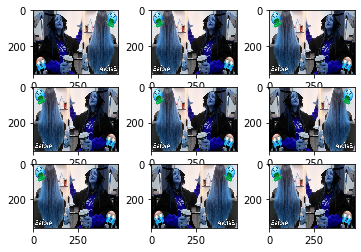

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
#img = load_img('bird.jpg')
# convert to numpy array
data = npimg[10]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
#filter size 2*
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(360, 480, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 358, 478, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 179, 239, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 177, 237, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 88, 118, 32)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 86, 116, 32)       9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 86, 116, 32)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 43, 58, 32)       

Train on 808 samples, validate on 203 samples
Epoch 1/30
808/808 [==============================] - 5s 6ms/sample - loss: 64.4401 - acc: 0.5359 - val_loss: 0.6786 - val_acc: 0.6010
Epoch 2/30
808/808 [==============================] - 4s 5ms/sample - loss: 0.6630 - acc: 0.6077 - val_loss: 0.6676 - val_acc: 0.5714
Epoch 3/30
808/808 [==============================] - 4s 6ms/sample - loss: 0.5912 - acc: 0.6448 - val_loss: 0.7320 - val_acc: 0.5813
Epoch 4/30
808/808 [==============================] - 4s 5ms/sample - loss: 0.5253 - acc: 0.7488 - val_loss: 0.6779 - val_acc: 0.6158
Epoch 5/30
808/808 [==============================] - 4s 6ms/sample - loss: 0.4203 - acc: 0.8082 - val_loss: 0.9962 - val_acc: 0.5419
Epoch 6/30
808/808 [==============================] - 4s 5ms/sample - loss: 0.3497 - acc: 0.8540 - val_loss: 0.8847 - val_acc: 0.5025
Epoch 7/30
808/808 [==============================] - 4s 5ms/sample - loss: 0.3039 - acc: 0.8601 - val_loss: 0.9424 - val_acc: 0.5764
Epoch 8/30
808/

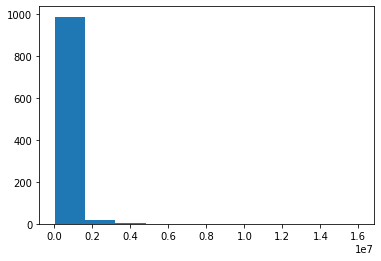

In [0]:
import matplotlib.pyplot as plt
plt.hist(df['views'])
mean=df['views'].mean()
df=df.assign(popularity=df['views']>mean)
labels=df['popularity']
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(npimg, labels, test_size=0.2, random_state=5)
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))
datagen = ImageDataGenerator()
it = datagen.flow(X, y)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)

compute quantities required for featurewise normalization
(std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_images)

fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),steps_per_epoch=len(train_images) / 32, epochs=epochs,validation_data=(test_images,test_labels))


In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']

In [0]:
acc.append(history.history['acc'])

In [0]:
history.history['val_acc']

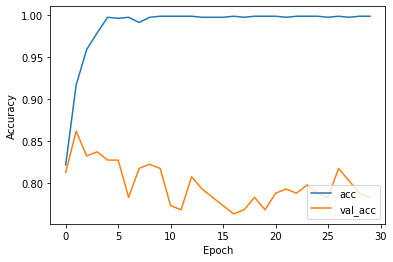

In [0]:
# Evaluate the model
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')